In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from epilink import (
    TOIT,
    TOST,
    InfectiousnessParams,
    genetic_linkage_probability,
    pairwise_linkage_probability_matrix,
    presymptomatic_fraction,
    temporal_linkage_probability,
)

sns.set_theme(context="paper", style="white", font_scale=1.2)

## Reproducing [Hart et al. (2021)](https://doi.org/10.7554/eLife.65534) results using fitted parameters (defaults)

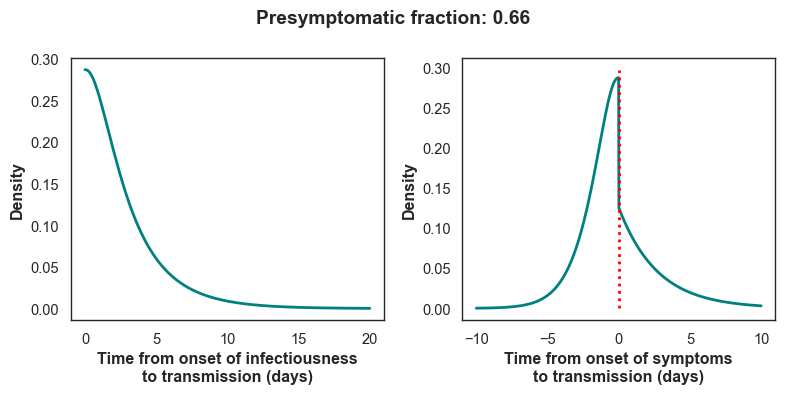

In [3]:
params = InfectiousnessParams(k_inc=5.807, scale_inc=0.948, k_E=3.38, mu=0.37, k_I=1, alpha=2.29)

toit = TOIT(params=params)
tost = TOST(params=params)

pre_sym_frac = presymptomatic_fraction(params)

num_samples = 1000

tost_values = np.linspace(-10, 10, num_samples)
tost_pdf = tost.pdf(tost_values)

toit_values = np.linspace(0, 20, num_samples)
toit_pdf = toit.pdf(toit_values)

fig1, axes1 = plt.subplots(1, 2, figsize=(8, 4))

sns.lineplot(x=toit_values, y=toit_pdf, color="teal", ax=axes1[0], linewidth=2)
axes1[0].set_xlabel("Time from onset of infectiousness\nto transmission (days)", fontweight="bold")
axes1[0].set_ylabel("Density", fontweight="bold")

sns.lineplot(x=tost_values, y=tost_pdf, color="teal", ax=axes1[1], linewidth=2)
axes1[1].set_xlabel("Time from onset of symptoms\nto transmission (days)", fontweight="bold")
axes1[1].set_ylabel("Density", fontweight="bold")
axes1[1].vlines(0, ymin=0, ymax=max(tost_pdf) + 0.01, color="red", linestyle=":", linewidth=2)

plt.suptitle(f"Presymptomatic fraction: {pre_sym_frac:.2f}", fontweight="bold")

plt.tight_layout()
plt.show()

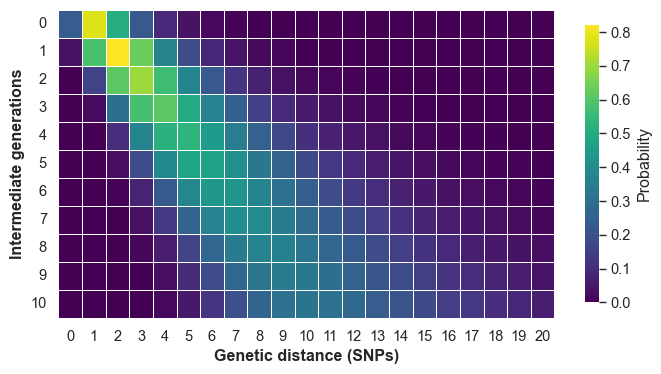

In [5]:
relaxed_genetic_prob = genetic_linkage_probability(
    genetic_distance=np.arange(0, 21, 1),  # 0 to 20 SNPs
    toit=TOIT(params=params, relax_rate=True),
    num_simulations=10000,
    no_intermediates=10,
    intermediate_generations=None,  # all
    kind="raw",
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    relaxed_genetic_prob.T,
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Probability", "shrink": 0.9},
)
plt.xlabel("Genetic distance (SNPs)", fontweight="bold")
plt.ylabel("Intermediate generations", fontweight="bold")
plt.yticks(rotation=0)
plt.xticks(ha="center")
plt.show()
plt.close()

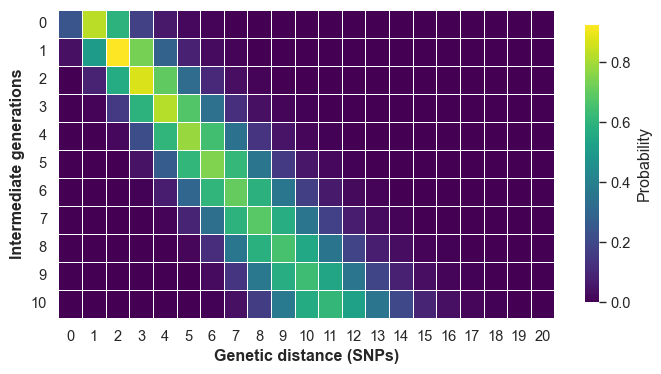

In [6]:
strict_genetic_prob = genetic_linkage_probability(
    genetic_distance=np.arange(0, 21, 1),  # 0 to 20 SNPs
    toit=TOIT(params=params),
    num_simulations=10000,
    no_intermediates=10,
    intermediate_generations=None,  # all
    kind="raw",
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    strict_genetic_prob.T,
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Probability", "shrink": 0.9},
)
plt.xlabel("Genetic distance (SNPs)", fontweight="bold")
plt.ylabel("Intermediate generations", fontweight="bold")
plt.yticks(rotation=0)
plt.xticks(ha="center")
plt.show()
plt.close()

Genetic distance alone cannot faithfully discriminate between different events.

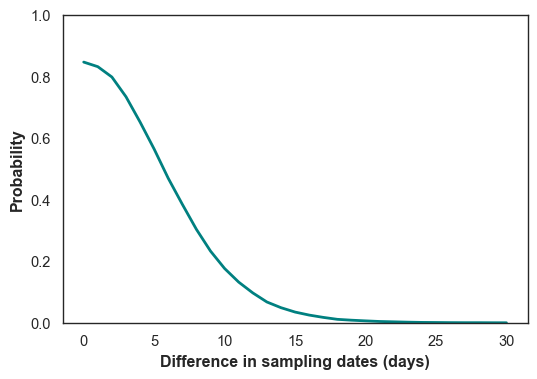

In [7]:
temporal_prob = temporal_linkage_probability(
    temporal_distance=np.arange(0, 31, 1), toit=toit, num_simulations=10000  # 0 to 30 days
)

plt.figure(figsize=(6, 4))
sns.lineplot(x=np.arange(0, 31, 1), y=temporal_prob, color="teal", linewidth=2)
plt.xlabel("Difference in sampling dates (days)", fontweight="bold")
plt.ylabel("Probability", fontweight="bold")
plt.ylim(0, 1)
plt.show()
plt.close()

# Joint probability of recent transmission

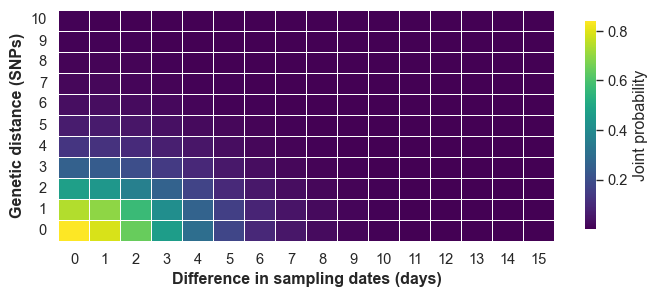

In [8]:
genetic_axis = np.arange(0, 11, 1)  # 0 to 10 SNPs
temporal_axis = np.arange(0, 31, 2)  # 0 to 30 days

prob_matrix = pairwise_linkage_probability_matrix(
    genetic_distances=genetic_axis,
    temporal_distances=temporal_axis,
    intermediate_generations=(0, 1),
    num_simulations=10000,
    relax_rate=True,
)


plt.figure(figsize=(8, 3))
sns.heatmap(
    prob_matrix,
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Joint probability", "shrink": 0.9},
)


plt.ylabel("Genetic distance (SNPs)", fontweight="bold")
plt.yticks(rotation=360)
plt.gca().invert_yaxis()
plt.xlabel("Difference in sampling dates (days)", fontweight="bold")
plt.show()
plt.close()

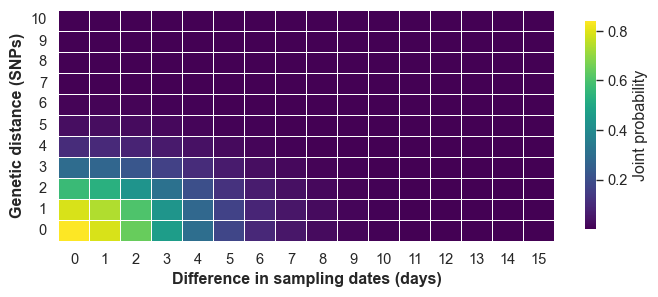

In [9]:
genetic_axis = np.arange(0, 11, 1)  # 0 to 10 SNPs
temporal_axis = np.arange(0, 31, 2)  # 0 to 30 days

prob_matrix = pairwise_linkage_probability_matrix(
    genetic_distances=genetic_axis,
    temporal_distances=temporal_axis,
    intermediate_generations=(0, 1),
    num_simulations=10000,
    relax_rate=False,
)


plt.figure(figsize=(8, 3))
sns.heatmap(
    prob_matrix,
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Joint probability", "shrink": 0.9},
)


plt.ylabel("Genetic distance (SNPs)", fontweight="bold")
plt.yticks(rotation=360)
plt.gca().invert_yaxis()
plt.xlabel("Difference in sampling dates (days)", fontweight="bold")
plt.show()
plt.close()